In [1]:
# Libraries
import pandas as pd
import numpy as np
import scipy as sp
import math 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import special
import os
from sklearn.metrics import r2_score

h_04_sec.csv
h_05_sec.csv
h_06_sec.csv
h_07_sec.csv
h_08_sec.csv
h_09_sec.csv
h_10_sec.csv
h_11_sec.csv
h_12_sec.csv
x0 = 256.46 s
Maximum power = 26.86 mW
Beam waist = 61.35 s
R^2 : 0.99963
x0 = 210.29 s
Maximum power = 26.66 mW
Beam waist = 48.84 s
R^2 : 0.99929
x0 = 218.42 s
Maximum power = 27.31 mW
Beam waist = 42.08 s
R^2 : 0.99906
x0 = 110.47 s
Maximum power = 27.71 mW
Beam waist = 32.85 s
R^2 : 0.99877
x0 = 116.77 s
Maximum power = 27.80 mW
Beam waist = 25.96 s
R^2 : 0.99896
x0 = 104.53 s
Maximum power = 26.77 mW
Beam waist = 21.08 s
R^2 : 0.99884
x0 = 79.65 s
Maximum power = 26.50 mW
Beam waist = 18.14 s
R^2 : 0.99923
x0 = 78.92 s
Maximum power = 26.55 mW
Beam waist = 18.88 s
R^2 : 0.99948
x0 = 62.34 s
Maximum power = 26.25 mW
Beam waist = 19.95 s
R^2 : 0.99924


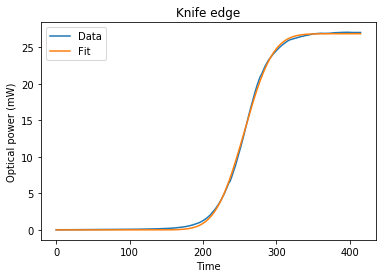

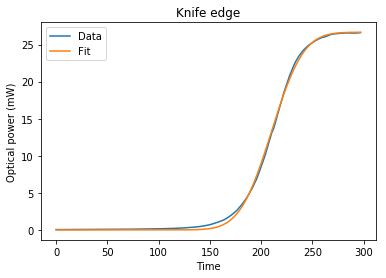

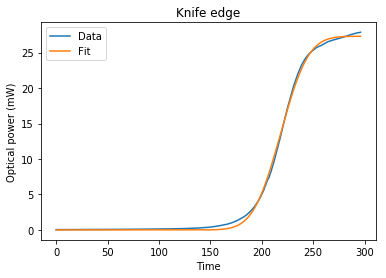

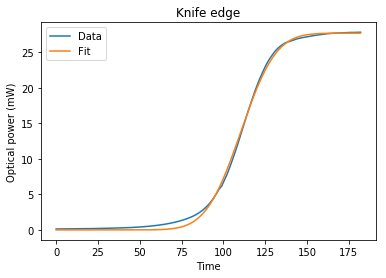

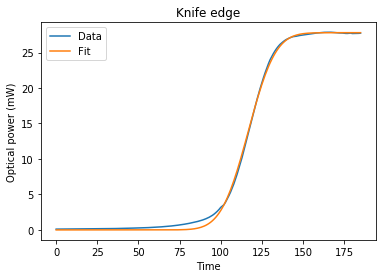

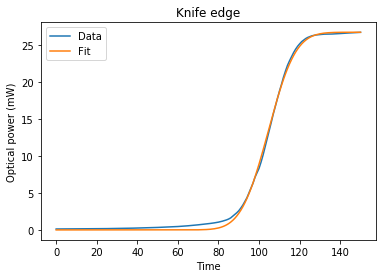

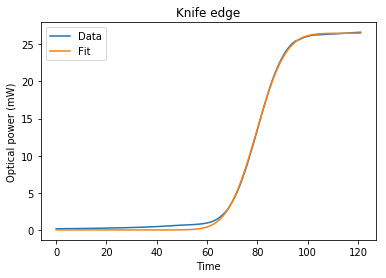

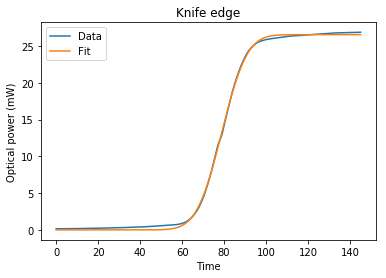

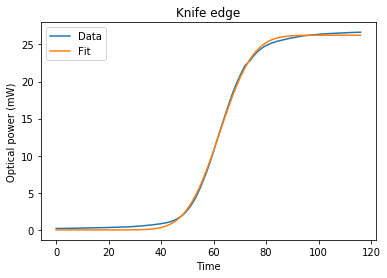

In [2]:
# Reading multiple csv files

path=r'C:\Users\malli\OneDrive\Desktop\SIMPLE\Beam waist data 5-19-22'

file_directory=[]

for filename in sorted(os.listdir(path)):
    if filename.endswith(".csv"): 
        print(filename)
        df = pd.read_csv(filename, delimiter=';', header=16,  usecols=[2, 3], names=['Time', 'Power'])
        file_directory.append(df)
        
# define function for curve fitting - - error function
def model(x,x0,p_max,w):
    return (1/2)*p_max*(1+special.erf(math.sqrt(2)*(x-x0)/w))

# initial guesses for parameters for x0, p_max, w
pO=[100,30,50] 

ws=[]
        
for df in file_directory:
    length = len(df['Time'])
    x = np.arange(length)
    y = 10**3*df['Power']
    
    # fit curve 
    popt, pcov = curve_fit(model,x,y,pO) #popt -- optimal values of parameters
    #define the fitting function
    yp=model(x,popt[0],popt[1],popt[2])
    
    print('x0 = %.2f s'% (popt[0]))
    print('Maximum power = {:.2f} mW'.format(popt[1]))
    print('Beam waist = {:.2f} s'.format(popt[2]))
    print('R^2 : %.5f'%(r2_score(y,yp)))
    
    w=popt[2]
    ws.append(w)
   
    plt.figure()
    plt.title('Knife edge')
    plt.xlabel('Time')
    plt.ylabel('Optical power (mW)')
    plt.plot(x,y,label='Data')
    plt.plot(x,yp, label='Fit')
    #
    plt.legend()

z0 = 10.40986724 s
w0 = 16.70940 s
a = -146.83077 s
R^2 : 0.99018


C:\Users\malli\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  
C:\Users\malli\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  


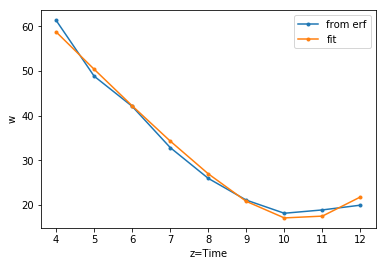

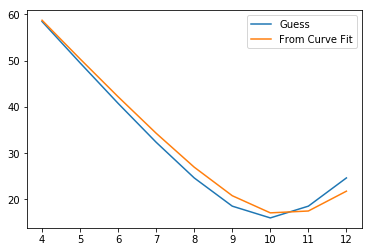

In [3]:
#Define waist
def waist_dist(z, z0, w0):
    l = 1.064e-6 #wavelength of beam
    zr = sp.pi*w0**2/l #raleigh length
    return w0*sp.sqrt(1 + ((z-z0)/zr)**2) 

def waist_time(z,z0,w0,a):
    return w0*sp.sqrt(1 + (a*(z-z0)/w0**2)**2) 

z = np.linspace(4,12,9)

#z_math = [-8*2.54**-2 + 10**(-28), 0*2.54**-2 + 10**(-28), 6*2.54**-2 + 10**(-28) ]
#ws_math = [0.00111418, 0.0000767522, 0.00085307]

#initial guess for z0,w0,a
g1=[11,16, -100] 

popt, pcov = curve_fit(waist_time,z,ws,g1)

#define the fitting function
yp_w=waist_time(z,popt[0], popt[1],popt[2])
print('z0 = %.8f s'% (popt[0]))
print('w0 = %.5f s'% (popt[1]))
print('a = %.5f s'% (popt[2]))

# find R^2 value
print('R^2 : %.5f'%(r2_score(ws,yp_w)))
plt.figure()
#plt.title('Gaussian fit using Knife Edge method')
plt.xlabel('z=Time')
plt.ylabel('w')

#Plot data
plt.plot(z,ws, label='from erf', marker=".")

#Plot the fitting function
plt.plot(z,yp_w, label='fit', marker=".")
plt.legend()

w0_guess = 10
z0_guess = 16
a_guess = -150 


line_guess = []

for z_val in z:
    line = waist_time(z_val,w0_guess,z0_guess,a_guess)
    line_guess.append(line)
    

plt.figure()
plt.plot(z,line_guess, label='Guess')  
plt.plot(z,yp_w, label='From Curve Fit')
plt.legend()